<a href="https://colab.research.google.com/github/Manognarayasam/Call_Volume_Trend/blob/main/NagaManognaRayasam_HomeworkWeek_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

### Import data

In [2]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Mounted at /content/drive


In [9]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1

Using the `weather` dataset, construct a derived data frame having the following qualities:

1. Each row represents an observation day
2. Each column represents an hourly temperature observation.  That is, the dataframe includes 24 columns of the form `tmpmeasx`	where x ranges from 0 to 23 and represents the observation taken that hour.  (For changes from daylight savings time to standard time, there are two observations at the 1:00 hour (local).  You may discard one of the values arbitrarily.)

Using this derived dataset, show the average difference in temperature, standard deviation, and max/min values between observations taken in hours 2 (about 2:56am) and 14 (about 14:56, or 2:56pm).

**Note:** The derived (reshaped) data frame should comprise one row for each distinct date in the data set, and 25 columns (representing date together with 24 hourly measurements).  Assign a new column calculated as the difference between `tmpmeas14` and `tmpmeas2`.  This calculated column represents the temperature increase for the day between 2:56 and 14:56.  Find the summary statistics (mean, max, min, and standard deviation) for this column.

In [5]:
print(wdf.columns)

Index(['date', 'wnd_speed', 'tmp_meas', 'precip', 'precip_intensity',
       'cloudcover', 'tstorm', 'winter', 'mist', 'fog'],
      dtype='object')


In [17]:
# Convert the 'date' column in the weather data to datetime (with timezone)
wdf['date'] = pd.to_datetime(wdf['date'], utc=True, errors='coerce')

# Extract the day and hour from the 'date' column
wdf['day'] = wdf['date'].dt.date
wdf['hour'] = wdf['date'].dt.hour

# Pivot the weather data to create hourly temperature observations
hourly_temps = wdf.pivot_table(
    index='day',
    columns='hour',
    values='tmp_meas',
    aggfunc='first'
)
# Rename the columns to 'tmpmeasX' where X represents the hour
hourly_temps.columns = [f'tmpmeas{x}' for x in hourly_temps.columns]

# Drop rows without full 24-hour data
hourly_temps = hourly_temps.dropna()

# Add a new column to calculate the temperature difference between hour 14 and hour 2
hourly_temps['temp_diff'] = hourly_temps['tmpmeas14'] - hourly_temps['tmpmeas2']

# Calculate summary statistics for the temperature difference
mean_diff = hourly_temps['temp_diff'].mean()
max_diff = hourly_temps['temp_diff'].max()
min_diff = hourly_temps['temp_diff'].min()
std_diff = hourly_temps['temp_diff'].std()

# Display summary statistics
print("Summary Statistics for Temperature Difference (2:56 AM and 2:56 PM):")
print(f"Mean Difference: {mean_diff:.2f}°C")
print(f"Max Difference: {max_diff:.2f}°C")
print(f"Min Difference: {min_diff:.2f}°C")
print(f"Standard Deviation: {std_diff:.2f}°C")
# Display first few rows of the reshaped dataframe
print("\nFirst few rows of the reshaped dataframe:")
print(hourly_temps.head())



Summary Statistics for Temperature Difference (2:56 AM and 2:56 PM):
Mean Difference: 2.74°C
Max Difference: 16.10°C
Min Difference: -16.10°C
Standard Deviation: 3.70°C

First few rows of the reshaped dataframe:
            tmpmeas0  tmpmeas1  tmpmeas2  tmpmeas3  tmpmeas4  tmpmeas5  \
day                                                                      
2016-01-01       7.2       6.1       6.7       6.1       5.6       5.0   
2016-01-02       1.1       0.6      -0.6       0.6       0.6      -0.6   
2016-01-03       1.7       0.6       0.0      -1.1      -1.7      -1.7   
2016-01-04       2.8       1.7       0.6       0.0      -1.1      -2.2   
2016-01-05      -3.3      -5.0      -6.1      -7.2      -8.3      -9.4   

            tmpmeas6  tmpmeas7  tmpmeas8  tmpmeas9  ...  tmpmeas15  tmpmeas16  \
day                                                 ...                         
2016-01-01       4.4       3.9       3.3       3.3  ...        5.6        6.7   
2016-01-02      -1.7      

## Question 2

**Circular data and One-Hot Encoding** Using the `Citations` data frame (`cdf`), discard records where the violation timestamp is not between January 1, 2021 and July 1, 2022.

In [10]:
print(cdf.columns)

Index(['citation', 'tag', 'state', 'violcode', 'description', 'violfine',
       'violdate', 'location', 'violdtl'],
      dtype='object')


Identify the 5 most common violation types.  Remove from the derivative data frame any observation where the violation type is not among these 5 most common

In [25]:
# Convert 'violdate' to datetime and filter based on the date range
cdf['violdate'] = pd.to_datetime(cdf['violdate'], errors='coerce')

# Filter rows where 'violdate' is between '2021-01-01' and '2022-07-01'
new_cdf = cdf[(cdf['violdate'] >= '2021-01-01') & (cdf['violdate'] <= '2022-07-01')]

print(new_cdf.head())


        citation      tag state  violcode  \
4632   001713171   N73LDS    NJ        12   
4633   001713189  9ET0286    MD        99   
4634   001713197  9EP2809    MD        99   
7770   003481843  3EJ7926    MD        99   
10928  000130278  19213CD    MD        27   

                                    description  violfine            violdate  \
4632     No Stopping/Standing Not Tow-Away Zone        32 2021-01-31 18:40:00   
4633   All Other Stopping or Parking Violations        32 2021-12-29 17:00:00   
4634   All Other Stopping or Parking Violations        32 2021-12-29 17:00:00   
7770   All Other Stopping or Parking Violations        32 2021-08-27 18:45:00   
10928              No Stop/Park Street Cleaning        52 2021-06-06 23:40:00   

                          location             violdtl  
4632                               2021-01-31 18:40:00  
4633                               2021-12-29 17:00:00  
4634                               2021-12-29 17:00:00  
7770          

In [26]:
# Identify the 5 most common violation types
top_5_violations = cdf['violcode'].value_counts().nlargest(5).index

# Filter the dataframe to only include rows where the violation type is in the top 5
cdf_top_5 = cdf[cdf['violcode'].isin(top_5_violations)]

print(cdf_top_5)


          citation      tag state  violcode  \
4        000000562  9AE2340    MD        18   
16       000001313  1AG6448    MD        18   
17       000001388  27930M3    MD        18   
18       000001487   6CZD50    MD        18   
19       000001495  4AM9379    MD        18   
...            ...      ...   ...       ...   
7891740  500314103   LTC338    MD        30   
7891741  500314104  1FH5756    MD        30   
7891742  500314105  64390CD    MD        30   
7891743  500314106  2BA2462    MD        31   
7891744  500314107  A389325    MD        30   

                                description  violfine            violdate  \
4        All Other Parking Meter Violations        32 2011-12-12 10:47:00   
16       All Other Parking Meter Violations        32 2011-12-12 11:55:00   
17       All Other Parking Meter Violations        32 2011-12-12 14:42:59   
18       All Other Parking Meter Violations        32 2011-12-27 10:40:00   
19       All Other Parking Meter Violations       

Identify the average time of day for each violation in the derivative data frame.  (You will need to use the circular mean to compute this average.  Hint: begin by transforming the time of day to an angle on the unit circle, where $0=2\pi$ radians indicates midnight, and $\pi$ radians represents noon.)

Note: the following functions may be useful for this question:

In [27]:
import numpy as np
from typing import Tuple


@np.vectorize
def timetotheta(hr: int, min: int) -> float:
  """ Convert a time of day (hour, minute) to an angle on the unit circle
    (e.g., (12,0) -> pi)
  """
  ratio = (hr * 60 + min) / (23*60+60)
  return ratio * 2 * np.pi

@np.vectorize
def thetatotime(theta: float) -> (int, int):
  """ Convert a an angle on the unit circle to a time
    (e.g., pi -> "12:00")
  """
  theta = theta + (2 * np.pi) if theta < 0 else theta
  elapsedmin = np.round(theta/(2 * np.pi) * 24 * 60)
  hr, min = np.divmod(elapsedmin, 60)
  return f"{int(hr):02d}:{int(min):02d}"

In [33]:
import numpy as np
import pandas as pd

# Convert time (hour, minute) to angle on the unit circle
cdf['theta'] = timetotheta(cdf['violdate'].dt.hour, cdf['violdate'].dt.minute)

# Group by 'violcode' and 'description', calculate circular mean
circular_means = cdf.groupby(['violcode', 'description'])['theta'].mean()

# Drop NaN values from circular means
circular_means = circular_means.dropna()

# Convert circular means back to time
avg_violation_times = circular_means.apply(thetatotime).reset_index(name='avg_time')

# Display the result
print(avg_violation_times)


<ipython-input-33-26925a73abad>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  circular_means = cdf.groupby(['violcode', 'description'])['theta'].mean()


    violcode                                        description avg_time
0          1                                 Abandonded Vehicle    11:39
1          2            No Stopping or No Parking Pimlico Event    11:54
2          3                  Obstruct/Impeding Flow of Traffic    13:20
3          4                     Snow Emergency Route Violation    11:38
4          5           Obstruct/Impeding Movement of Pedestrian    13:09
5          6                    Fire Lane/Handicapped Violation    14:15
6          7             Parking or Parking Meter Tow-Away zone    13:01
7          8                 No Stopping/Standing Tow Away Zone    13:16
8          9           Commercial Veh/Residence over 20,000 lbs    15:26
9         10          Commercial Veh/Residence under 20,000 lbs    16:39
10        11                    Residential Parking Permit Only    15:23
11        12             No Stopping/Standing Not Tow-Away Zone    13:30
12        13                        Blocking Garage

The violation type column is a nominal field.  Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.

In [34]:
import pandas as pd
# One-hot encode the 'violcode' column
ohe_violcode = pd.get_dummies(cdf['violcode'], prefix='violcode')

# Add the one-hot encoded variables to the original DataFrame
cdf = pd.concat([cdf, ohe_violcode], axis=1)

# Display the updated DataFrame
print(cdf.head())


    citation       tag state  violcode  \
0  000000091    03W671    MD        27   
1  000000166  T294093T    MD        12   
2  000000299  19TLR318    ME        99   
3  000000315  14TLR551    ME        99   
4  000000562   9AE2340    MD        18   

                                description  violfine            violdate  \
0              No Stop/Park Street Cleaning        52 2011-12-09 11:55:00   
1    No Stopping/Standing Not Tow-Away Zone        32 2011-12-09 12:39:00   
2  All Other Stopping or Parking Violations        32 2011-12-09 11:55:00   
3  All Other Stopping or Parking Violations        32 2011-12-09 12:01:59   
4        All Other Parking Meter Violations        32 2011-12-12 10:47:00   

                            location             violdtl  hour  ...  \
0                                    2011-12-09 11:55:00    11  ...   
1                                    2011-12-09 12:39:00    12  ...   
2                                    2011-12-09 11:55:00    11  ...   


## Question 3
 Join the citations and weather datasets to produce a merged data frame.  The merged data frame should provide, for each citation, the reported weather conditions for the closest weather observation.

In [43]:
import pandas as pd

# Convert citation and weather date columns to timezone-naive datetime with nanosecond precision
cdf['violdate'] = pd.to_datetime(cdf['violdate'], errors='coerce').dt.tz_localize(None).astype('datetime64[ns]')
wdf['date'] = pd.to_datetime(wdf['date'], errors='coerce').dt.tz_localize(None).astype('datetime64[ns]')

# Sort both DataFrames by their date columns for merging
cdf = cdf.sort_values('violdate')
wdf = wdf.sort_values('date')

# Efficiently merge citations with the nearest weather observation
merged_df = pd.merge_asof(cdf, wdf, left_on='violdate', right_on='date', direction='nearest')

# Drop unnecessary columns and show the first few rows of the merged data
merged_df = merged_df.drop(columns=['date'])
print(merged_df.head())


    citation      tag state  violcode          description  violfine  \
0  040231789   YRJ641    MD        30  Red Light Violation        75   
1  041021270   GES259    MD        30  Red Light Violation        75   
2  041036682   CYX244    MD        30  Red Light Violation        75   
3  041379157   DYH813    MD        30  Red Light Violation        75   
4  043219849  A006827    MD        30  Red Light Violation        75   

             violdate location             violdtl  hour_x  ...  precip  \
0 1999-07-27 04:11:00          1999-07-27 04:11:00       4  ...     0.0   
1 2000-05-26 14:41:00          2000-05-26 14:41:00      14  ...     0.0   
2 2000-06-01 18:59:59          2000-06-01 18:59:59      18  ...     0.0   
3 2000-08-26 01:47:00          2000-08-26 01:47:00       1  ...     0.0   
4 2002-01-26 09:11:59          2002-01-26 09:11:59       9  ...     0.0   

   precip_intensity  cloudcover  tstorm  winter  mist  fog         day  \
0                 0         4.0       0   

From this joined data set, examine instances of fixed speed camera citations (violation type 32).  Does weather affect citation volumes?  Justify your conclusion. [Note: you do not need to provide a statistical proof; it is sufficient to justify your conclusion through visual or descriptive analysis.]

In [45]:
print(violation_32_df.columns)


Index(['citation', 'tag', 'state', 'violcode', 'description', 'violfine',
       'violdate', 'location', 'violdtl', 'hour_x', 'minute', 'theta',
       'violcode_1', 'violcode_2', 'violcode_3', 'violcode_4', 'violcode_5',
       'violcode_6', 'violcode_7', 'violcode_8', 'violcode_9', 'violcode_10',
       'violcode_11', 'violcode_12', 'violcode_13', 'violcode_14',
       'violcode_15', 'violcode_16', 'violcode_17', 'violcode_18',
       'violcode_19', 'violcode_20', 'violcode_22', 'violcode_23',
       'violcode_25', 'violcode_26', 'violcode_27', 'violcode_28',
       'violcode_30', 'violcode_31', 'violcode_32', 'violcode_33',
       'violcode_34', 'violcode_36', 'violcode_37', 'violcode_38',
       'violcode_39', 'violcode_40', 'violcode_41', 'violcode_42',
       'violcode_43', 'violcode_44', 'violcode_45', 'violcode_46',
       'violcode_47', 'violcode_50', 'violcode_51', 'violcode_52',
       'violcode_99', 'wnd_speed', 'tmp_meas', 'precip', 'precip_intensity',
       'cloudcover',

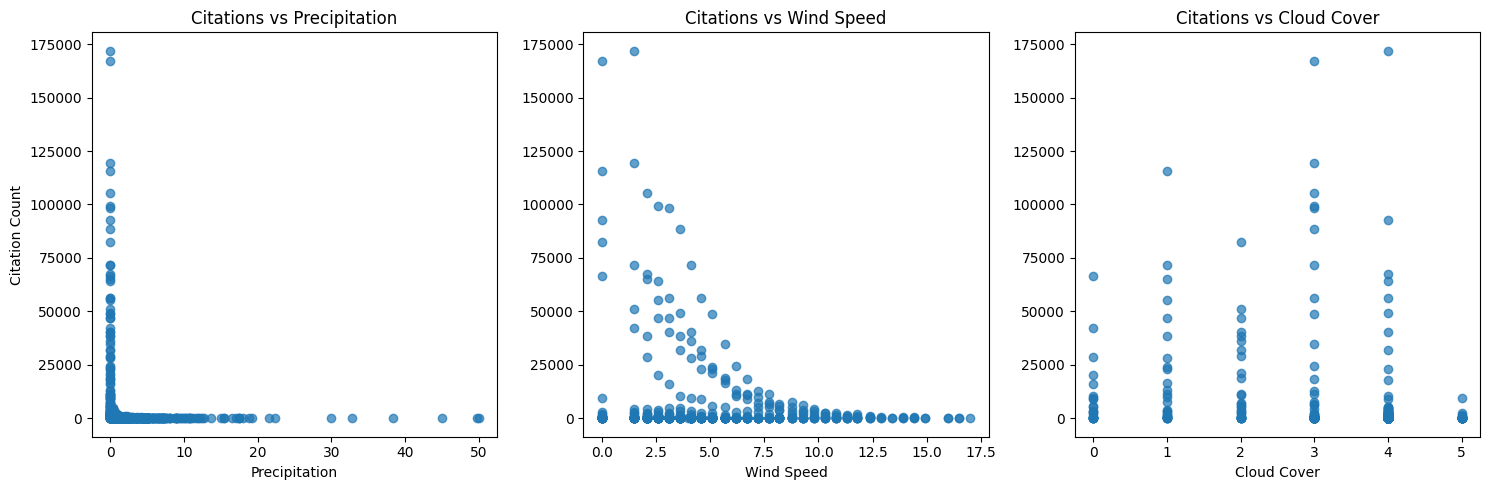

In [49]:
import matplotlib.pyplot as plt

# Group by the correct weather conditions and count citations
weather_citations = violation_32_df.groupby(['precip', 'wnd_speed', 'cloudcover']).size().reset_index(name='citation_count')

# Plot citations vs weather conditions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(weather_citations['precip'], weather_citations['citation_count'], alpha=0.7)
axes[0].set_title('Citations vs Precipitation')
axes[0].set_xlabel('Precipitation')
axes[0].set_ylabel('Citation Count')

axes[1].scatter(weather_citations['wnd_speed'], weather_citations['citation_count'], alpha=0.7)
axes[1].set_title('Citations vs Wind Speed')
axes[1].set_xlabel('Wind Speed')

axes[2].scatter(weather_citations['cloudcover'], weather_citations['citation_count'], alpha=0.7)
axes[2].set_title('Citations vs Cloud Cover')
axes[2].set_xlabel('Cloud Cover')

plt.tight_layout()
plt.show()
